In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from time import sleep
import os
import pywt
import warnings
import sklearn
from tensorflow.keras import optimizers
from tensorflow.keras import layers
from keras_preprocessing.sequence import pad_sequences
import keras
import tensorflow as tf
from sklearn.model_selection import train_test_split
from scipy.stats import skew, kurtosis
from keras.layers import Conv1D 
from keras.layers import GlobalMaxPooling1D
from keras.layers import Bidirectional
from sklearn import metrics
from sklearn.metrics import ConfusionMatrixDisplay
from keras.layers import Conv1D 
from keras.layers import Bidirectional
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import RepeatVector
from keras.layers import Dense, Dropout, Activation, Bidirectional

In [2]:
dirA="./Datasets/setA/"
tempA=[]
for file in os.listdir(dirA):
    fl = dirA + file
    tempA.append(fl)
tempA = sorted(tempA)

dirB="./Datasets/setB/"
tempB=[]
for file in os.listdir(dirB):
    fl = dirB + file
    tempB.append(fl)
tempB = sorted(tempB)

dirC="./Datasets/setC/"
tempC=[]
for file in os.listdir(dirC):
    fl = dirC + file
    tempC.append(fl)
tempC = sorted(tempC)

dirD="./Datasets/setD/"
tempD=[]
for file in os.listdir(dirD):
    fl = dirD + file
    tempD.append(fl)
tempD = sorted(tempD)

dirE="./Datasets/setE/"
tempE=[]
for file in os.listdir(dirE):
    fl = dirE + file
    tempE.append(fl)
tempE = sorted(tempE)

In [3]:
tempA, tempB, tempC, tempD, tempE

(['./Datasets/setA/Z001.txt',
  './Datasets/setA/Z002.txt',
  './Datasets/setA/Z003.txt',
  './Datasets/setA/Z004.txt',
  './Datasets/setA/Z005.txt',
  './Datasets/setA/Z006.txt',
  './Datasets/setA/Z007.txt',
  './Datasets/setA/Z008.txt',
  './Datasets/setA/Z009.txt',
  './Datasets/setA/Z010.txt',
  './Datasets/setA/Z011.txt',
  './Datasets/setA/Z012.txt',
  './Datasets/setA/Z013.txt',
  './Datasets/setA/Z014.txt',
  './Datasets/setA/Z015.txt',
  './Datasets/setA/Z016.txt',
  './Datasets/setA/Z017.txt',
  './Datasets/setA/Z018.txt',
  './Datasets/setA/Z019.txt',
  './Datasets/setA/Z020.txt',
  './Datasets/setA/Z021.txt',
  './Datasets/setA/Z022.txt',
  './Datasets/setA/Z023.txt',
  './Datasets/setA/Z024.txt',
  './Datasets/setA/Z025.txt',
  './Datasets/setA/Z026.txt',
  './Datasets/setA/Z027.txt',
  './Datasets/setA/Z028.txt',
  './Datasets/setA/Z029.txt',
  './Datasets/setA/Z030.txt',
  './Datasets/setA/Z031.txt',
  './Datasets/setA/Z032.txt',
  './Datasets/setA/Z033.txt',
  './Datas

In [4]:
ta=[]
st = 'A'
for i in range(len(tempA)):
    x = pd.read_table(tempA[i],header=None)
    x.columns=[st+str(i)]
    ta.append(x)

tb=[]
st = 'A'
for i in range(len(tempB)):
    x = pd.read_table(tempB[i],header=None)
    x.columns=[st+str(i)]
    tb.append(x)

tc=[]
st = 'A'
for i in range(len(tempC)):
    x = pd.read_table(tempC[i],header=None)
    x.columns=[st+str(i)]
    tc.append(x)
    
td=[]
st = 'A'
for i in range(len(tempD)):
    x = pd.read_table(tempD[i],header=None)
    x.columns=[st+str(i)]
    td.append(x)
    
te=[]
st = 'A'
for i in range(len(tempE)):
    x = pd.read_table(tempE[i],header=None)
    x.columns=[st+str(i)]
    te.append(x)

In [5]:
ta, tb, tc, td, te

([      A0
  0     12
  1     22
  2     35
  3     45
  4     69
  ...   ..
  4092 -25
  4093 -28
  4094 -11
  4095   8
  4096  77
  
  [4097 rows x 1 columns],
         A1
  0     -56
  1     -50
  2     -64
  3     -91
  4    -135
  ...   ...
  4092 -172
  4093 -180
  4094 -173
  4095 -162
  4096  -82
  
  [4097 rows x 1 columns],
        A2
  0    -37
  1    -22
  2    -17
  3    -24
  4    -31
  ...   ..
  4092  -3
  4093   7
  4094   3
  4095   4
  4096  82
  
  [4097 rows x 1 columns],
        A3
  0    -31
  1    -43
  2    -39
  3    -39
  4     -9
  ...   ..
  4092  11
  4093  12
  4094  -6
  4095  10
  4096  33
  
  [4097 rows x 1 columns],
        A4
  0     14
  1     26
  2     32
  3     25
  4     16
  ...   ..
  4092 -55
  4093 -58
  4094 -32
  4095  -6
  4096 -17
  
  [4097 rows x 1 columns],
        A5
  0    -87
  1    -89
  2    -73
  3    -69
  4    -51
  ...   ..
  4092  32
  4093  37
  4094  18
  4095   7
  4096   7
  
  [4097 rows x 1 columns],
        A6
  0  

In [6]:
def table(table):
    big_table=None
    for tf in table:
        big_table=pd.concat([big_table,tf],axis=1)
    return big_table

In [7]:
bigA=table(ta)
bigB=table(tb)
bigC=table(tc)
bigD=table(td)
bigE=table(te)

head=list(bigA.columns.values)

In [8]:
def creat_mat(mat):
    matx = np.zeros((len(mat),(len(head))))
    for i in range(len(head)):
        matx[:,i] = mat[head[i]]
        sleep(0.01)
    return matx

In [9]:
matA = creat_mat(bigA)
matB = creat_mat(bigB)
matC = creat_mat(bigC)
matD = creat_mat(bigD)
matE = creat_mat(bigE) 

matA = np.nan_to_num(matA)
matB = np.nan_to_num(matB)
matC = np.nan_to_num(matC)
matD = np.nan_to_num(matD)
matE = np.nan_to_num(matE)

In [10]:
matA.shape, matB.shape, matC.shape, matD.shape, matE.shape

((4097, 100), (4097, 100), (4097, 100), (4097, 100), (4097, 100))

In [11]:
matN_out = np.zeros((1,100))
X_data_N = np.concatenate((matA,matN_out), axis = 0) 
print(X_data_N.shape)

(4098, 100)


In [12]:
matI_out = np.ones((1,100))
X_data_I = np.concatenate((matC,matI_out), axis = 0) 
print(X_data_I.shape)

(4098, 100)


In [13]:
matS_out = np.full((1,100),[2])
X_data_S = np.concatenate((matE,matS_out), axis = 0) 
print(X_data_S.shape)

(4098, 100)


In [14]:
data = np.concatenate((X_data_N,X_data_I,X_data_S), axis =1)
data = data.T
c = 'A'
col = []
sig = []
for i in range(np.size(data,1)-1):
    col.append(st+str(i))
for i in range(np.size(data,0)):
    sig.append('S'+str(i))
col.append('out')
TotalData = pd.DataFrame(data, columns=col, index= sig)

In [15]:
TotalData

,A0,A1,A2,A3,A4,A5,A6,A7,A8,A9,...,A4088,A4089,A4090,A4091,A4092,A4093,A4094,A4095,A4096,out
S0,12.0,22.0,35.0,45.0,69.0,74.0,79.0,78.0,66.0,43.0,...,-28.0,-21.0,-14.0,-14.0,-25.0,-28.0,-11.0,8.0,77.0,0.0
S1,-56.0,-50.0,-64.0,-91.0,-135.0,-140.0,-134.0,-114.0,-115.0,-126.0,...,-82.0,-114.0,-138.0,-159.0,-172.0,-180.0,-173.0,-162.0,-82.0,0.0
S2,-37.0,-22.0,-17.0,-24.0,-31.0,-20.0,-5.0,14.0,31.0,31.0,...,-52.0,-23.0,-14.0,-5.0,-3.0,7.0,3.0,4.0,82.0,0.0
S3,-31.0,-43.0,-39.0,-39.0,-9.0,-5.0,18.0,7.0,-12.0,-42.0,...,-32.0,-40.0,-23.0,-1.0,11.0,12.0,-6.0,10.0,33.0,0.0
S4,14.0,26.0,32.0,25.0,16.0,8.0,8.0,12.0,11.0,19.0,...,-19.0,-29.0,-35.0,-51.0,-55.0,-58.0,-32.0,-6.0,-17.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
S295,-40.0,-58.0,-75.0,-88.0,-89.0,-81.0,-67.0,-52.0,-28.0,14.0,...,32.0,32.0,18.0,6.0,-3.0,-10.0,-13.0,-16.0,-151.0,2.0
S296,187.0,44.0,-147.0,-368.0,-550.0,-657.0,-665.0,-581.0,-442.0,-290.0,...,510.0,562.0,607.0,667.0,748.0,763.0,703.0,446.0,-537.0,2.0
S297,-438.0,-561.0,-622.0,-581.0,-460.0,-295.0,-164.0,-70.0,3.0,66.0,...,443.0,399.0,319.0,196.0,40.0,-47.0,-118.0,-163.0,-56.0,2.0
S298,-476.0,-518.0,-521.0,-362.0,-68.0,175.0,289.0,184.0,15.0,-130.0,...,-261.0,-248.0,-147.0,36.0,224.0,299.0,246.0,556.0,276.0,2.0


In [16]:
df = TotalData.drop(['out'], axis =1)
target = TotalData['out']

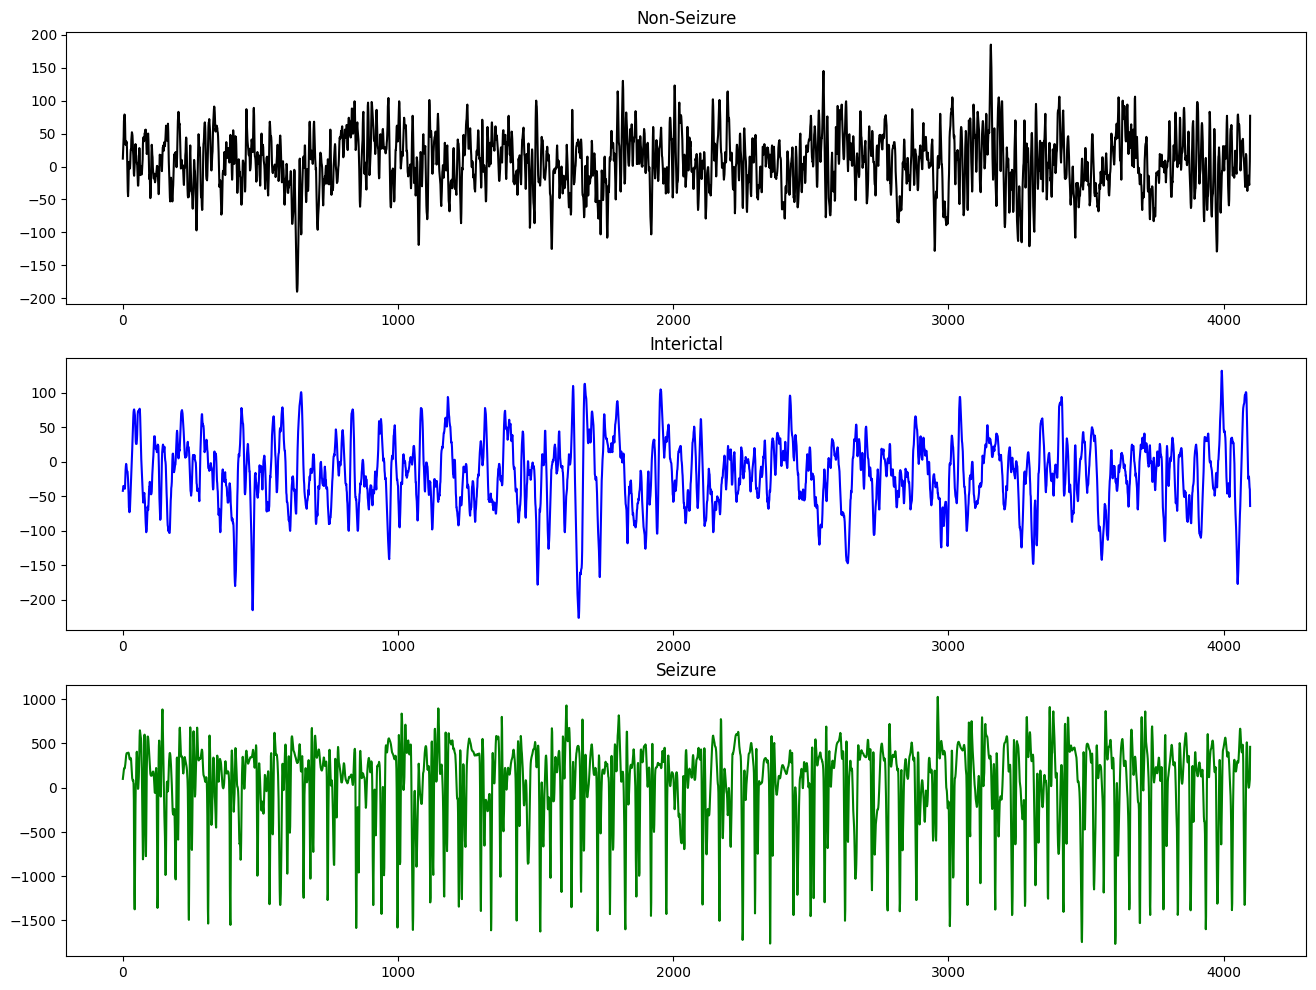

In [17]:
samples = np.arange(0,4097,1)
plt.figure(figsize=(16,12))
plt.subplot(3,1,1)
plt.title('Non-Seizure')
plt.plot(samples,matA[:,0], label = 'Non-Seizure',color='black')
plt.subplot(3,1,2)
plt.title('Interictal')
plt.plot(samples,matC[:,0], label = 'Interictal',color='blue')
plt.subplot(3,1,3)
plt.title('Seizure')
plt.plot(samples,matE[:,0],label= 'Seizure',color='green')
plt.show()

In [18]:
final_values = []

In [19]:
filters = pywt.wavelist()
print(filters)
print(len(filters))
level =5
w_name = 'bior4.4'

['bior1.1', 'bior1.3', 'bior1.5', 'bior2.2', 'bior2.4', 'bior2.6', 'bior2.8', 'bior3.1', 'bior3.3', 'bior3.5', 'bior3.7', 'bior3.9', 'bior4.4', 'bior5.5', 'bior6.8', 'cgau1', 'cgau2', 'cgau3', 'cgau4', 'cgau5', 'cgau6', 'cgau7', 'cgau8', 'cmor', 'coif1', 'coif2', 'coif3', 'coif4', 'coif5', 'coif6', 'coif7', 'coif8', 'coif9', 'coif10', 'coif11', 'coif12', 'coif13', 'coif14', 'coif15', 'coif16', 'coif17', 'db1', 'db2', 'db3', 'db4', 'db5', 'db6', 'db7', 'db8', 'db9', 'db10', 'db11', 'db12', 'db13', 'db14', 'db15', 'db16', 'db17', 'db18', 'db19', 'db20', 'db21', 'db22', 'db23', 'db24', 'db25', 'db26', 'db27', 'db28', 'db29', 'db30', 'db31', 'db32', 'db33', 'db34', 'db35', 'db36', 'db37', 'db38', 'dmey', 'fbsp', 'gaus1', 'gaus2', 'gaus3', 'gaus4', 'gaus5', 'gaus6', 'gaus7', 'gaus8', 'haar', 'mexh', 'morl', 'rbio1.1', 'rbio1.3', 'rbio1.5', 'rbio2.2', 'rbio2.4', 'rbio2.6', 'rbio2.8', 'rbio3.1', 'rbio3.3', 'rbio3.5', 'rbio3.7', 'rbio3.9', 'rbio4.4', 'rbio5.5', 'rbio6.8', 'shan', 'sym2', 'sym3

In [20]:
w = pywt.Wavelet(w_name)
temp_cA = []
temp_cD5 = []
temp_cD4 = []
temp_cD3 = []
temp_cD2 = []
temp_cD1 = []
for i in matA.T:
  cA,cD5,cD4,cD3,cD2,cD1 = pywt.wavedec(i, w, mode='constant', level=level)
  temp_cA.append(cA)
  temp_cD1.append(cD1)
  temp_cD2.append(cD2)
  temp_cD3.append(cD3)
  temp_cD4.append(cD4)
  temp_cD5.append(cD5)
coeff_cA = np.array(temp_cA)
coeff_cD1 = np.array(temp_cD1)
coeff_cD2 = np.array(temp_cD2)
coeff_cD3 = np.array(temp_cD3)
coeff_cD4 = np.array(temp_cD4)
coeff_cD5 = np.array(temp_cD5)

In [21]:
w = pywt.Wavelet(w_name)
temp_cA_I = []
temp_cD5_I = []
temp_cD4_I = []
temp_cD3_I = []
temp_cD2_I = []
temp_cD1_I = []
for i in matC.T:
  cA_I,cD5_I,cD4_I,cD3_I,cD2_I,cD1_I = pywt.wavedec(i, w, mode='constant', level=level)
  temp_cA_I.append(cA_I)
  temp_cD3_I.append(cD3_I)
  temp_cD4_I.append(cD4_I)
  temp_cD5_I.append(cD5_I)
  temp_cD2_I.append(cD2_I)
  temp_cD1_I.append(cD1_I)
coeff_cA_I  = np.array(temp_cA_I)
coeff_cD5_I = np.array(temp_cD5_I)
coeff_cD4_I = np.array(temp_cD4_I)
coeff_cD3_I = np.array(temp_cD3_I)
coeff_cD2_I = np.array(temp_cD2_I)
coeff_cD1_I = np.array(temp_cD1_I)

In [22]:
w = pywt.Wavelet(w_name)
temp_cA_S = []
temp_cD5_S = []
temp_cD4_S = []
temp_cD3_S = []
temp_cD2_S = []
temp_cD1_S = []
for i in matE.T:
  cA_S,cD5_S,cD4_S,cD3_S,cD2_S,cD1_S = pywt.wavedec(i, w, mode='constant', level=level)
  temp_cA_S.append(cA_S)
  temp_cD3_S.append(cD3_S)
  temp_cD4_S.append(cD4_S)
  temp_cD5_S.append(cD5_S)
  temp_cD2_S.append(cD2_S)
  temp_cD1_S.append(cD1_S)
coeff_cA_S = np.array(temp_cA_S)
coeff_cD5_S = np.array(temp_cD5_S)
coeff_cD4_S = np.array(temp_cD4_S)
coeff_cD3_S = np.array(temp_cD3_S)
coeff_cD2_S = np.array(temp_cD2_S)
coeff_cD1_S = np.array(temp_cD1_S)

In [23]:
#Seizure
print(coeff_cA_S.shape)
print(coeff_cD5_S.shape)
print(coeff_cD4_S.shape)
print(coeff_cD3_S.shape)
print(coeff_cD2_S.shape)
print(coeff_cD1_S.shape)

#Interictal
print(coeff_cA_I.shape)
print(coeff_cD5_I.shape)
print(coeff_cD4_I.shape)
print(coeff_cD3_I.shape)
print(coeff_cD2_I.shape)
print(coeff_cD1_I.shape)

#Normal
print(coeff_cA.shape)
print(coeff_cD5.shape)
print(coeff_cD4.shape)
print(coeff_cD3.shape)
print(coeff_cD2.shape)
print(coeff_cD1.shape)

(100, 136)
(100, 136)
(100, 264)
(100, 520)
(100, 1031)
(100, 2053)
(100, 136)
(100, 136)
(100, 264)
(100, 520)
(100, 1031)
(100, 2053)
(100, 136)
(100, 136)
(100, 264)
(100, 520)
(100, 1031)
(100, 2053)


In [24]:
coeff_cA_total = np.concatenate([coeff_cA, coeff_cA_I,coeff_cA_S])
coeff_cD1_total = np.concatenate([coeff_cD1, coeff_cD1_I,coeff_cD1_S])
coeff_cD2_total = np.concatenate([coeff_cD2, coeff_cD2_I,coeff_cD2_S])
coeff_cD3_total = np.concatenate([coeff_cD3, coeff_cD3_I,coeff_cD3_S])
coeff_cD4_total = np.concatenate([coeff_cD4, coeff_cD4_I,coeff_cD4_S])
coeff_cD5_total = np.concatenate([coeff_cD5, coeff_cD5_I,coeff_cD5_S])

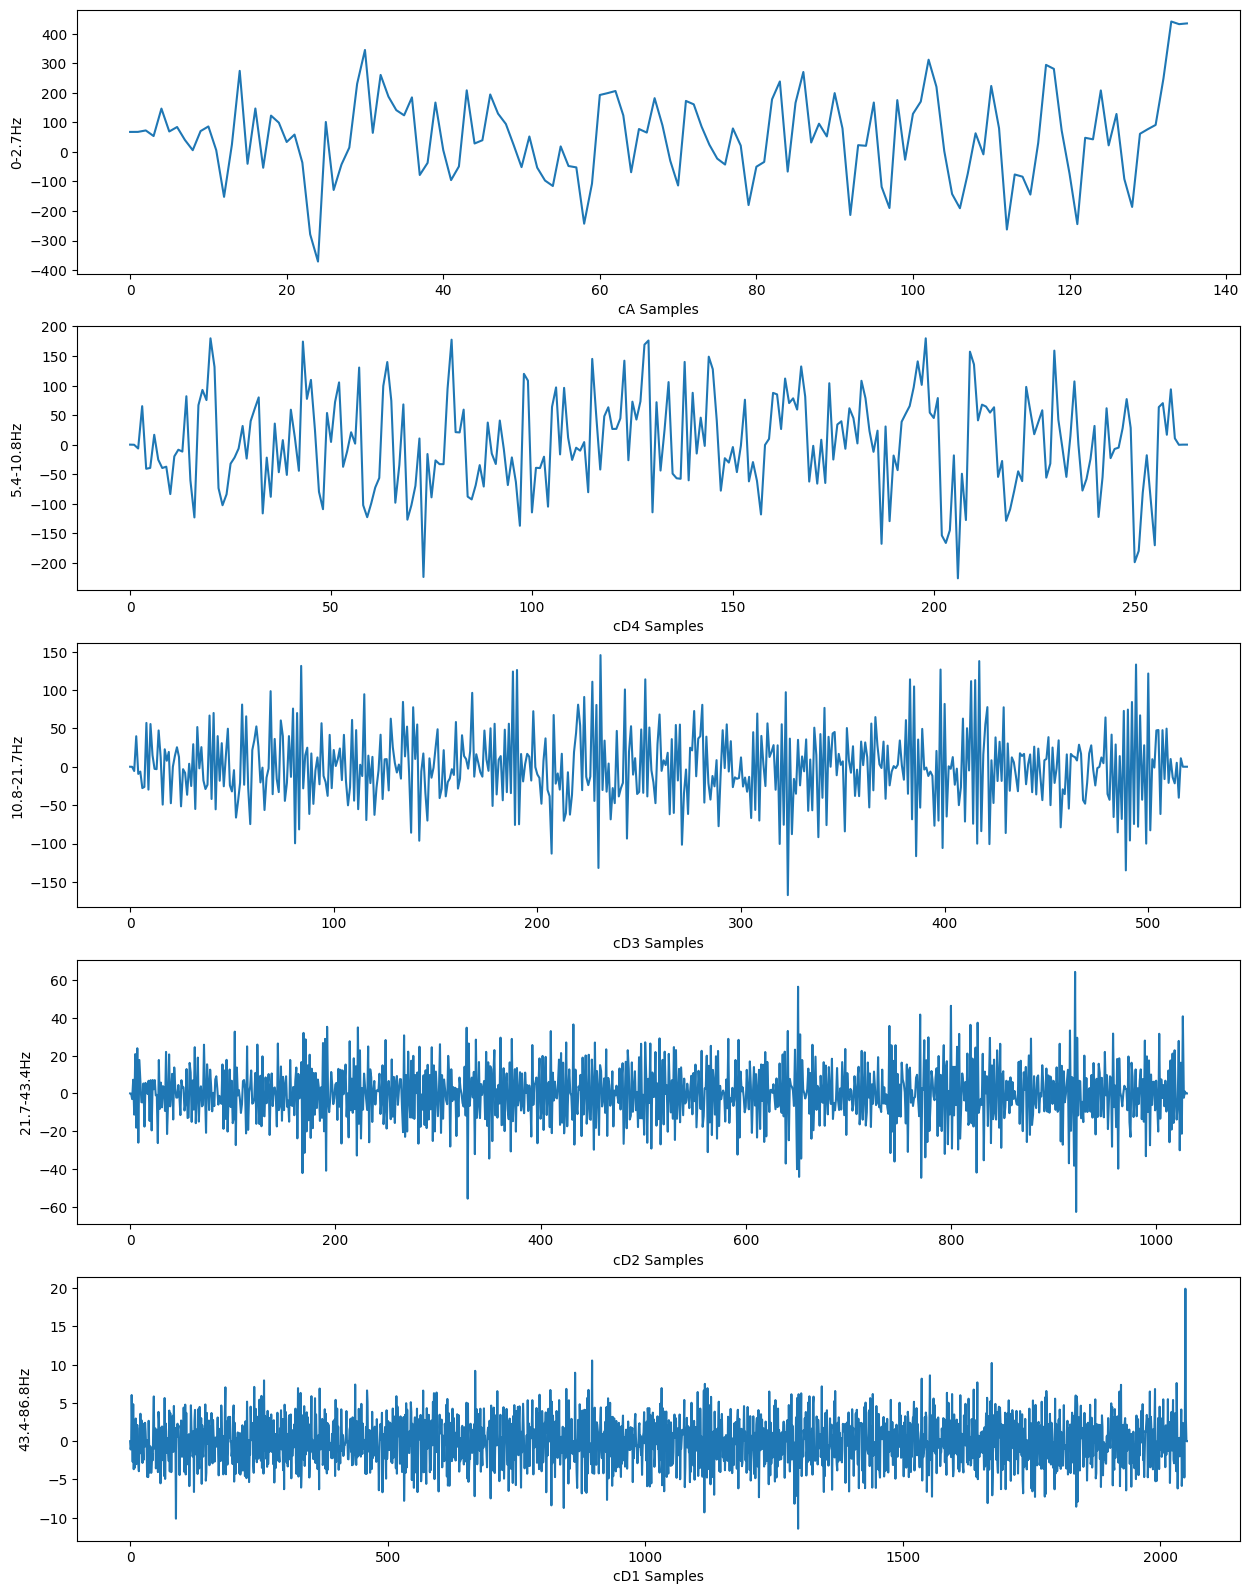

In [25]:
plt.figure(figsize=(15,24))
plt.subplot(level+1,1,1)
plt.ylabel('0-2.7Hz')
plt.xlabel('cA Samples')
plt.plot(np.arange(0,len(coeff_cA[0]),1),coeff_cA[0,:].T)

# plt.subplot(level+1,1,2)
# plt.ylabel('2.7-5.4Hz')
# plt.xlabel('cD5 Samples')
# plt.plot(np.arange(0,len(coeff_cD5[0]),1),coeff_cD5[0,:].T)

plt.subplot(level+1,1,2)
plt.ylabel('5.4-10.8Hz')
plt.xlabel('cD4 Samples')
plt.plot(np.arange(0,len(coeff_cD4[0]),1),coeff_cD4[0,:].T)

plt.subplot(level+1,1,3)
plt.ylabel('10.8-21.7Hz')
plt.xlabel('cD3 Samples')
plt.plot(np.arange(0,len(coeff_cD3[0]),1),coeff_cD3[0,:].T)

plt.subplot(level+1,1,4)
plt.ylabel('21.7-43.4Hz')
plt.xlabel('cD2 Samples')
plt.plot(np.arange(0,len(coeff_cD2[0]),1),coeff_cD2[0,:].T)

plt.subplot(level+1,1,5)
plt.ylabel('43.4-86.8Hz')
plt.xlabel('cD1 Samples')
plt.plot(np.arange(0,len(coeff_cD1[0]),1),coeff_cD1[0,:].T)

plt.show()

In [26]:
feature_size = 4
columns_name = list()
for i in range(feature_size):
    columns_name = columns_name + ['f'+str(i+1)]
columns_name = columns_name + ['class']

In [27]:
def build_features(mat):
    lis = list()
    lis = lis + [skew(mat)]
    lis = lis + [kurtosis(mat)]
    lis = lis + [np.ptp(mat)]
    lis = lis + [np.std(mat)]
    sleep(0.01)
             
    return lis

In [28]:
# create features of class I and cA
f1_cA_N    = np.zeros((100,1))
f2_cA_N    = np.zeros((100,1))
f3_cA_N    = np.zeros((100,1))
f4_cA_N    = np.zeros((100,1))

for i in range(100):
    [f1_cA_N[i,0],f2_cA_N[i,0],f3_cA_N[i,0],f4_cA_N[i,0]]=build_features(coeff_cA.T[:,i])

# # create features of class I and cD1
# f1_cD1_N    = np.zeros((100,1))
# f2_cD1_N    = np.zeros((100,1))
# f3_cD1_N    = np.zeros((100,1))
# f4_cD1_N    = np.zeros((100,1))

# for i in range(100):
#     [f1_cD1_N[i,0],f2_cD1_N[i,0],f3_cD1_N[i,0],f4_cD1_N[i,0]]=build_features(coeff_cD1.T[:,i])
  
# create features of class I and cD1
f1_cD2_N   = np.zeros((100,1))
f2_cD2_N   = np.zeros((100,1))
f3_cD2_N   = np.zeros((100,1))
f4_cD2_N   = np.zeros((100,1))

for i in range(100):
    [f1_cD2_N[i,0],f2_cD2_N[i,0],f3_cD2_N[i,0],f4_cD2_N[i,0]]=build_features(coeff_cD2.T[:,i])

# create features of class I and cD3
f1_cD3_N   = np.zeros((100,1))
f2_cD3_N   = np.zeros((100,1))
f3_cD3_N   = np.zeros((100,1))
f4_cD3_N   = np.zeros((100,1))

for i in range(100):
    [f1_cD3_N[i,0],f2_cD3_N[i,0],f3_cD3_N[i,0],f4_cD3_N[i,0]]=build_features(coeff_cD3.T[:,i])

# create features of class I and cD4
f1_cD4_N   = np.zeros((100,1))
f2_cD4_N   = np.zeros((100,1))
f3_cD4_N   = np.zeros((100,1))
f4_cD4_N   = np.zeros((100,1))

for i in range(100):
    [f1_cD4_N[i,0],f2_cD4_N[i,0],f3_cD4_N[i,0],f4_cD4_N[i,0]]=build_features(coeff_cD4.T[:,i])
    
# create features of class I and cD5
f1_cD5_N   = np.zeros((100,1))
f2_cD5_N   = np.zeros((100,1))
f3_cD5_N   = np.zeros((100,1))
f4_cD5_N   = np.zeros((100,1))

for i in range(100):
    [f1_cD5_N[i,0],f2_cD5_N[i,0],f3_cD5_N[i,0],f4_cD5_N[i,0]]=build_features(coeff_cD5.T[:,i])

In [29]:
# create features of class II (INTERICTAL and cA)
f1_cA_I    = np.zeros((100,1))
f2_cA_I    = np.zeros((100,1))
f3_cA_I    = np.zeros((100,1))
f4_cA_I    = np.zeros((100,1))

for i in range(100):
    [f1_cA_I[i,0],f2_cA_I[i,0],f3_cA_I[i,0],f4_cA_I[i,0]]=build_features(coeff_cA_I.T[:,i])

# # create features of class II (INTERICTAL and cD1)
# f1_cD1_I    = np.zeros((100,1))
# f2_cD1_I    = np.zeros((100,1))
# f3_cD1_I    = np.zeros((100,1))
# f4_cD1_I    = np.zeros((100,1))

# for i in range(100):
#     [f1_cD1_I[i,0],f2_cD1_I[i,0],f3_cD1_I[i,0],f4_cD1_I[i,0]]=build_features(coeff_cD1_I.T[:,i])

# create features of class II (INTERICTAL and cD2)
f1_cD2_I    = np.zeros((100,1))
f2_cD2_I    = np.zeros((100,1))
f3_cD2_I    = np.zeros((100,1))
f4_cD2_I    = np.zeros((100,1))

for i in range(100):
    [f1_cD2_I[i,0],f2_cD2_I[i,0],f3_cD2_I[i,0],f4_cD2_I[i,0]]=build_features(coeff_cD2_I.T[:,i])
    
# create features of class II (INTERICTAL and cD3)
f1_cD3_I    = np.zeros((100,1))
f2_cD3_I    = np.zeros((100,1))
f3_cD3_I    = np.zeros((100,1))
f4_cD3_I    = np.zeros((100,1))


for i in range(100):
    [f1_cD3_I[i,0],f2_cD3_I[i,0],f3_cD3_I[i,0],f4_cD3_I[i,0]]=build_features(coeff_cD3_I.T[:,i])
    

# create features of class II (INTERICTAL and cD4)
f1_cD4_I    = np.zeros((100,1))
f2_cD4_I    = np.zeros((100,1))
f3_cD4_I    = np.zeros((100,1))
f4_cD4_I    = np.zeros((100,1))

for i in range(100):
    [f1_cD4_I[i,0],f2_cD4_I[i,0],f3_cD4_I[i,0],f4_cD4_I[i,0]]=build_features(coeff_cD4_I.T[:,i])

# create features of class II (INTERICTAL and cD5)
f1_cD5_I    = np.zeros((100,1))
f2_cD5_I    = np.zeros((100,1))
f3_cD5_I    = np.zeros((100,1))
f4_cD5_I    = np.zeros((100,1))

for i in range(100):
    [f1_cD5_I[i,0],f2_cD5_I[i,0],f3_cD5_I[i,0],f4_cD5_I[i,0]]=build_features(coeff_cD5_I.T[:,i])

In [30]:
# create features of class III (SEIZURE and cA)
f1_cA_S    = np.zeros((100,1))
f2_cA_S    = np.zeros((100,1))
f3_cA_S    = np.zeros((100,1))
f4_cA_S    = np.zeros((100,1))

for i in range(100):
    [f1_cA_S[i,0],f2_cA_S[i,0],f3_cA_S[i,0],f4_cA_S[i,0]]=build_features(coeff_cA_S.T[:,i])

# # create features of class III (SEIZURE and cD1)
# f1_cD1_S    = np.zeros((100,1))
# f2_cD1_S    = np.zeros((100,1))
# f3_cD1_S    = np.zeros((100,1))
# f4_cD1_S    = np.zeros((100,1))

# for i in range(100):
#     [f1_cD1_S[i,0],f2_cD1_S[i,0],f3_cD1_S[i,0],f4_cD1_S[i,0]]=build_features(coeff_cD1_S.T[:,i])

# create features of class III (SEIZURE and cD2)
f1_cD2_S    = np.zeros((100,1))
f2_cD2_S    = np.zeros((100,1))
f3_cD2_S    = np.zeros((100,1))
f4_cD2_S    = np.zeros((100,1))

for i in range(100):
    [f1_cD2_S[i,0],f2_cD2_S[i,0],f3_cD2_S[i,0],f4_cD2_S[i,0]]=build_features(coeff_cD2_S.T[:,i])
    
# create features of class III (SEIZURE and cD3)
f1_cD3_S    = np.zeros((100,1))
f2_cD3_S    = np.zeros((100,1))
f3_cD3_S    = np.zeros((100,1))
f4_cD3_S    = np.zeros((100,1))


for i in range(100):
    [f1_cD3_S[i,0],f2_cD3_S[i,0],f3_cD3_S[i,0],f4_cD3_S[i,0]]=build_features(coeff_cD3_S.T[:,i])
    

# create features of class III (SEIZURE and cD4)
f1_cD4_S    = np.zeros((100,1))
f2_cD4_S    = np.zeros((100,1))
f3_cD4_S    = np.zeros((100,1))
f4_cD4_S    = np.zeros((100,1))

for i in range(100):
    [f1_cD4_S[i,0],f2_cD4_S[i,0],f3_cD4_S[i,0],f4_cD4_S[i,0]]=build_features(coeff_cD4_S.T[:,i])

# create features of class III (SEIZURE and cD5)
f1_cD5_S    = np.zeros((100,1))
f2_cD5_S    = np.zeros((100,1))
f3_cD5_S    = np.zeros((100,1))
f4_cD5_S    = np.zeros((100,1))

for i in range(100):
    [f1_cD5_S[i,0],f2_cD5_S[i,0],f3_cD5_S[i,0],f4_cD5_S[i,0]]=build_features(coeff_cD5_S.T[:,i])

In [31]:
cl_N  = np.zeros((100,1))
cl_I  = np.ones((100,1))
cl_S  = np.full((100,1),[2])

In [32]:
MftN = np.concatenate([f1_cA_N, f2_cA_N, f3_cA_N, f4_cA_N,f1_cD2_N,f2_cD2_N,f3_cD2_N,f4_cD2_N,f1_cD3_N,f2_cD3_N,f3_cD3_N,f4_cD3_N,f1_cD4_N,f2_cD4_N,f3_cD4_N,f4_cD4_N,f1_cD5_N,f2_cD5_N,f3_cD5_N,f4_cD5_N,cl_N], axis=1)

MftI = np.concatenate([f1_cA_I, f2_cA_I, f3_cA_I, f4_cA_I,f1_cD2_I,f2_cD2_I,f3_cD2_I,f4_cD2_I,f1_cD3_I,f2_cD3_I,f3_cD3_I,f4_cD3_I,f1_cD4_I,f2_cD4_I,f3_cD4_I,f4_cD4_I,f1_cD5_I,f2_cD5_I,f3_cD5_I,f4_cD5_I,cl_I], axis=1)

MftS = np.concatenate([f1_cA_S, f2_cA_S, f3_cA_S, f4_cA_S,f1_cD2_S,f2_cD2_S,f3_cD2_S,f4_cD2_S,f1_cD3_S,f2_cD3_S,f3_cD3_S,f4_cD3_S,f1_cD4_S,f2_cD4_S,f3_cD4_S,f4_cD4_S,f1_cD5_S,f2_cD5_S,f3_cD5_S,f4_cD5_S,cl_S], axis=1)

In [33]:
FCM_N  = pd.DataFrame(MftN,columns=['f1','f2','f3','f4','f5','f6','f7','f8','f9','f10','f11','f12','f13','f14','f15','f16','f17','f18','f19','f20','class'])

FCM_I  = pd.DataFrame(MftI,columns=['f1','f2','f3','f4','f5','f6','f7','f8','f9','f10','f11','f12','f13','f14','f15','f16','f17','f18','f19','f20','class'])

FCM_S  = pd.DataFrame(MftS,columns=['f1','f2','f3','f4','f5','f6','f7','f8','f9','f10','f11','f12','f13','f14','f15','f16','f17','f18','f19','f20','class'])

In [34]:
FCM_N

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,...,f12,f13,f14,f15,f16,f17,f18,f19,f20,class
0,0.032633,0.333747,813.219464,145.509220,-0.025764,0.349559,127.157229,15.684259,0.114106,0.368619,...,48.133539,-0.110878,-0.188008,406.114676,79.962345,0.130829,0.372638,548.756953,97.506211,0.0
1,-0.365315,0.941557,864.499500,137.385320,0.117051,0.715851,176.069647,21.000446,-0.327358,1.386485,...,66.420030,0.114577,0.392621,602.530725,99.206352,-0.133648,-0.150724,468.284287,91.150232,0.0
2,0.336624,0.164241,956.997629,176.080340,0.079155,-0.007027,109.946852,16.205392,0.070539,0.243477,...,57.656654,0.025231,1.171448,589.084169,81.149149,0.087397,0.168815,488.015670,92.683891,0.0
3,0.031045,-0.428197,654.614523,119.598124,0.049144,0.404182,214.085462,28.637197,-0.286224,0.959472,...,65.649119,0.044907,0.864635,641.034234,92.894840,0.347144,1.125070,585.285904,88.703091,0.0
4,0.251737,-0.337937,755.785458,156.158724,-0.055442,0.281015,127.330851,17.640103,0.199468,1.633950,...,57.285809,-0.150464,0.738549,531.002179,77.619981,-0.227258,-0.142573,397.129024,70.136774,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,-0.445358,1.260025,919.921580,152.788957,-0.027330,-0.010023,120.089216,19.250474,0.029050,0.527097,...,62.611577,-0.314785,1.216843,608.061576,86.741222,-0.266838,0.216928,381.833347,75.080382,0.0
96,-0.513858,0.704067,809.058433,138.943656,0.057687,-0.197510,102.221915,16.989269,0.018109,-0.079359,...,51.968885,-0.123857,0.778934,527.459132,78.257483,0.040437,-0.567096,338.690064,72.644690,0.0
97,-0.109222,0.499089,914.650399,146.726768,0.017092,0.344687,105.422723,14.764122,-0.055235,0.241380,...,54.926817,0.098229,-0.138673,409.501078,77.291429,0.170205,0.226763,359.339646,70.631523,0.0
98,0.975474,0.920162,780.736609,154.185147,0.038039,0.069928,159.356182,26.123035,0.116612,0.192433,...,63.169617,-0.072083,0.732404,569.708930,84.955842,-0.292708,-0.066311,435.520588,85.520474,0.0


In [35]:
FCM_I

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,...,f12,f13,f14,f15,f16,f17,f18,f19,f20,class
0,-0.056982,-0.351756,1004.836133,188.698949,0.071269,0.277092,43.093408,6.164859,0.418659,1.684099,...,23.110301,-0.084496,0.561149,428.002241,66.037037,0.497341,0.931641,891.156694,149.385704,1.0
1,-0.180149,-0.409584,1321.034146,263.894207,-0.615610,8.199467,120.287920,9.489610,0.034330,1.911912,...,30.884805,0.020067,2.412535,740.365874,91.433065,0.723088,2.647657,1205.570364,181.501950,1.0
2,0.004802,0.060344,1036.745410,180.488403,0.141378,0.369893,59.900847,9.038794,0.151910,0.823325,...,27.855894,-0.238424,0.509453,421.545245,71.132974,0.395692,0.942960,675.188860,113.798035,1.0
3,0.625420,0.837902,1074.636275,189.747043,-0.187610,1.025702,72.819746,8.405203,-0.096058,0.296051,...,25.703159,-0.279491,0.114469,355.580743,65.510239,0.361798,0.211057,605.525852,111.528276,1.0
4,0.419954,-0.442017,2338.762595,462.638953,-0.056206,0.156929,284.681775,40.486101,-0.003337,0.294477,...,117.864515,0.278803,1.896005,1644.259415,196.682090,0.027121,0.205238,1426.270676,279.126379,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.222943,-0.526892,1287.418935,281.984404,0.038269,-0.194954,156.086298,24.556291,-0.126729,0.236764,...,64.693625,-0.246644,0.800908,766.308691,116.973123,0.019691,0.483717,840.726005,153.265662,1.0
96,0.132450,2.191010,591.626154,75.644380,0.147705,0.196056,22.908107,3.602824,-0.102027,0.707889,...,9.853504,-0.117579,-0.113279,170.446055,30.766569,0.124448,0.423834,281.097024,49.101378,1.0
97,-0.482232,1.154850,1413.488266,229.725303,0.158828,0.376360,99.022376,13.990778,-0.104694,0.547485,...,39.925591,-0.036261,0.586640,463.946825,75.672087,0.595703,1.526694,1149.837747,172.975809,1.0
98,-0.075781,0.645414,1858.548745,310.297487,0.045575,0.789928,48.950482,5.715672,0.241314,1.244225,...,21.269757,0.067190,0.121675,347.930426,58.725111,0.199156,0.561084,733.662944,126.126102,1.0


In [36]:
FCM_S

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,...,f12,f13,f14,f15,f16,f17,f18,f19,f20,class
0,0.061646,-0.475780,5098.141971,1089.055760,0.806165,4.009109,1519.702927,188.198427,0.438179,1.420510,...,708.737726,0.657445,0.619910,5025.042230,891.651159,-0.058563,-0.481091,5343.970827,1210.760926,2.0
1,0.094201,0.245713,6321.823818,1093.416893,0.303655,1.058073,1517.043515,220.860462,-0.032139,-0.077545,...,797.123185,0.268269,1.232229,5151.322937,795.926445,0.290411,-0.434894,6258.079180,1373.966607,2.0
2,2.218537,9.146464,7085.902292,1042.605004,0.025781,3.172986,1589.936917,196.949406,0.095931,1.724075,...,700.364935,0.065232,0.719035,4519.526748,624.753897,-0.135831,-0.553314,3879.168011,809.339537,2.0
3,-2.049907,7.418171,1734.382737,274.916282,0.004895,-0.172420,246.991705,40.466599,-0.135401,-0.539233,...,163.453773,-0.003458,-0.798350,1732.838783,407.090913,-0.089271,-0.762864,2077.826193,477.427802,2.0
4,0.223597,-0.471822,3700.555370,803.661177,0.160463,5.523056,800.016377,73.796071,-0.027492,1.412349,...,284.852268,0.287007,-0.417592,3262.196172,674.574388,0.220409,-0.922002,4359.132629,1111.187532,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,-0.205869,0.217589,1226.273513,225.966848,0.155479,1.643964,218.129026,24.457981,-0.176954,0.886795,...,108.785003,0.093696,0.018445,1580.447037,268.708030,-0.430241,0.456878,1496.661659,292.080230,2.0
96,-2.708520,13.790752,4412.154855,579.583490,0.430079,3.160398,951.619477,93.919868,0.282443,0.207767,...,525.395743,0.269523,-1.054019,5470.004556,1490.292344,-0.040705,-1.008765,6526.773152,1626.366492,2.0
97,-3.782846,16.571160,3125.016854,476.314405,0.258682,0.015626,385.754583,63.893571,0.159128,-0.934022,...,332.208029,0.365050,-0.995175,3065.299195,798.645433,-0.027245,-1.037446,3043.745834,778.186509,2.0
98,-1.119489,3.150429,4355.905552,767.064578,-0.637892,3.043922,1444.416810,165.844601,-0.600079,0.869552,...,596.888647,-0.412976,-0.239398,4665.390390,884.291011,0.026937,-0.844507,3574.457956,803.777148,2.0


In [37]:
TotalDataset = pd.concat([FCM_N,FCM_I,FCM_S],ignore_index=True)

In [38]:
print(TotalDataset.shape)

(300, 21)


In [39]:
TotalDataset

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,...,f12,f13,f14,f15,f16,f17,f18,f19,f20,class
0,0.032633,0.333747,813.219464,145.509220,-0.025764,0.349559,127.157229,15.684259,0.114106,0.368619,...,48.133539,-0.110878,-0.188008,406.114676,79.962345,0.130829,0.372638,548.756953,97.506211,0.0
1,-0.365315,0.941557,864.499500,137.385320,0.117051,0.715851,176.069647,21.000446,-0.327358,1.386485,...,66.420030,0.114577,0.392621,602.530725,99.206352,-0.133648,-0.150724,468.284287,91.150232,0.0
2,0.336624,0.164241,956.997629,176.080340,0.079155,-0.007027,109.946852,16.205392,0.070539,0.243477,...,57.656654,0.025231,1.171448,589.084169,81.149149,0.087397,0.168815,488.015670,92.683891,0.0
3,0.031045,-0.428197,654.614523,119.598124,0.049144,0.404182,214.085462,28.637197,-0.286224,0.959472,...,65.649119,0.044907,0.864635,641.034234,92.894840,0.347144,1.125070,585.285904,88.703091,0.0
4,0.251737,-0.337937,755.785458,156.158724,-0.055442,0.281015,127.330851,17.640103,0.199468,1.633950,...,57.285809,-0.150464,0.738549,531.002179,77.619981,-0.227258,-0.142573,397.129024,70.136774,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,-0.205869,0.217589,1226.273513,225.966848,0.155479,1.643964,218.129026,24.457981,-0.176954,0.886795,...,108.785003,0.093696,0.018445,1580.447037,268.708030,-0.430241,0.456878,1496.661659,292.080230,2.0
296,-2.708520,13.790752,4412.154855,579.583490,0.430079,3.160398,951.619477,93.919868,0.282443,0.207767,...,525.395743,0.269523,-1.054019,5470.004556,1490.292344,-0.040705,-1.008765,6526.773152,1626.366492,2.0
297,-3.782846,16.571160,3125.016854,476.314405,0.258682,0.015626,385.754583,63.893571,0.159128,-0.934022,...,332.208029,0.365050,-0.995175,3065.299195,798.645433,-0.027245,-1.037446,3043.745834,778.186509,2.0
298,-1.119489,3.150429,4355.905552,767.064578,-0.637892,3.043922,1444.416810,165.844601,-0.600079,0.869552,...,596.888647,-0.412976,-0.239398,4665.390390,884.291011,0.026937,-0.844507,3574.457956,803.777148,2.0


In [40]:
X = TotalDataset[['f1','f2','f3','f4','f5','f6','f7','f8','f9','f10','f11','f12','f13','f14','f15','f16','f17','f18','f19','f20']]
Y = TotalDataset[['class']]
X = np.asarray(X)
Y = np.asarray(Y)

In [41]:
from keras.utils import to_categorical
from numpy import array

In [43]:
y=to_categorical(Y)

In [44]:
print(y)

[[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1.

In [45]:
y = np.argmax(y, axis=-1)

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [48]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(240, 20)
(60, 20)
(240,)
(60,)


In [51]:
x_train=X_train.reshape(X_train.shape[0],20,1)
y_train=y_train.reshape(y_train.shape[0],1)
x_test=X_test.reshape(X_test.shape[0],20,1)
y_test=y_test.reshape(y_test.shape[0],1)

In [52]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(240, 20, 1)
(60, 20, 1)
(240, 1)
(60, 1)


In [53]:
model = Sequential()
model.add(LSTM(300, return_sequences=True, input_shape=(20,1)))
model.add(Conv1D(300, kernel_size=5, activation = 'relu'))
model.add(GlobalMaxPooling1D())
model.add(Dense(150))
model.add(Dense(3, activation='softmax'))
model.compile(optimizer = 'adam', loss ='sparse_categorical_crossentropy', metrics = ['accuracy'])
print(model.summary())
history=model.fit(X_train, y_train, batch_size = 64, epochs = 100)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 20, 300)           362400    
                                                                 
 conv1d (Conv1D)             (None, 16, 300)           450300    
                                                                 
 global_max_pooling1d (Glob  (None, 300)               0         
 alMaxPooling1D)                                                 
                                                                 
 dense (Dense)               (None, 150)               45150     
                                                                 
 dense_1 (Dense)             (None, 3)                 453       
                                                                 
Total params: 858303 (3.27 MB)
Trainable params: 858303 (3.27 MB)
Non-trainable params: 0 (0.00 Byte)
____________________

4/4 [==============================] - 0s 106ms/step - loss: 0.0012 - accuracy: 1.0000
Epoch 72/100
4/4 [==============================] - 0s 110ms/step - loss: 0.0010 - accuracy: 1.0000
Epoch 73/100
4/4 [==============================] - 0s 106ms/step - loss: 0.0011 - accuracy: 1.0000
Epoch 74/100
4/4 [==============================] - 0s 105ms/step - loss: 0.0010 - accuracy: 1.0000
Epoch 75/100
4/4 [==============================] - 0s 100ms/step - loss: 0.0010 - accuracy: 1.0000
Epoch 76/100
4/4 [==============================] - 0s 106ms/step - loss: 9.5400e-04 - accuracy: 1.0000
Epoch 77/100
4/4 [==============================] - 0s 107ms/step - loss: 9.3976e-04 - accuracy: 1.0000
Epoch 78/100
4/4 [==============================] - 0s 102ms/step - loss: 8.3408e-04 - accuracy: 1.0000
Epoch 79/100
4/4 [==============================] - 0s 98ms/step - loss: 7.6683e-04 - accuracy: 1.0000
Epoch 80/100
4/4 [==============================] - 0s 93ms/step - loss: 8.3315e-04 - accuracy: 1.

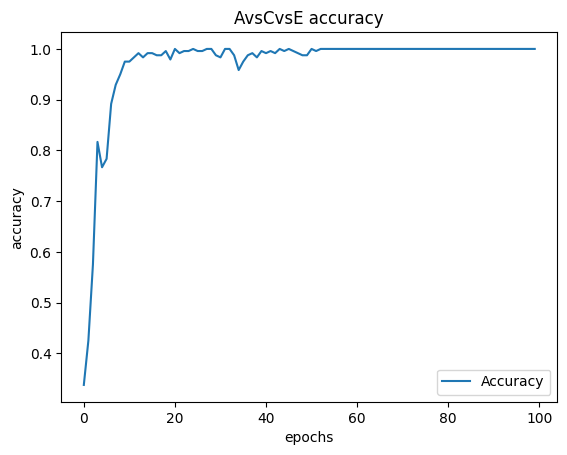

In [54]:
plt.plot(history.history['accuracy'])
plt.title('AvsCvsE accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend(['Accuracy'],loc='best')
plt.show()

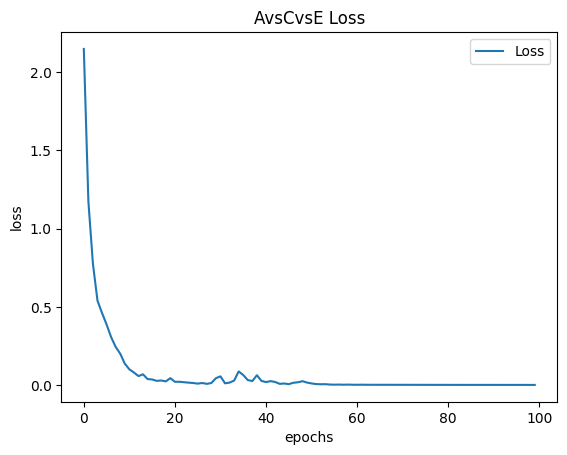

In [55]:
plt.plot(history.history['loss'])
plt.title('AvsCvsE Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['Loss'],loc='best')
plt.show()

In [56]:
y_pred=model.predict(X_test).round()

2/2 [==============================] - 1s 35ms/step


In [57]:
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Accuracy: 96.67%


In [58]:
y_pred

array([[0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0

In [59]:
y_pred=np.argmax(y_pred,axis=1)

In [60]:
y_pred

array([2, 2, 1, 0, 2, 2, 1, 1, 0, 1, 2, 0, 2, 0, 1, 2, 2, 2, 1, 1, 0, 1,
       2, 2, 2, 0, 2, 2, 1, 2, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 2, 0,
       0, 0, 2, 2, 1, 2, 1, 1, 2, 0, 2, 2, 0, 0, 1, 0], dtype=int64)

In [61]:
actual=y_test
predicted=y_pred

In [62]:
confusion_matrix = metrics.confusion_matrix(actual, predicted)

In [63]:
confusion_matrix

array([[22,  0,  0],
       [ 0, 15,  1],
       [ 0,  1, 21]], dtype=int64)

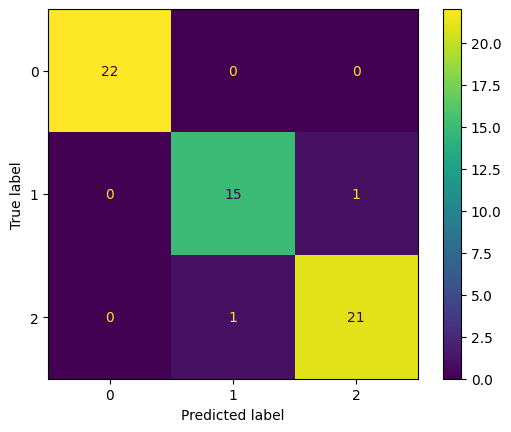

In [64]:
ConfusionMatrixDisplay.from_predictions( y_test, y_pred)
plt.show()

In [65]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        22
           1       0.94      0.94      0.94        16
           2       0.95      0.95      0.95        22

    accuracy                           0.97        60
   macro avg       0.96      0.96      0.96        60
weighted avg       0.97      0.97      0.97        60

